<img src="imgs/logo-spegc.svg" width=30%>

# PCA Principal Component Analisys

En estadística, el análisis de componentes principales (en inglés, PCA) es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables ("componentes") no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.
> Wikipedia

Mean X: 2.57707602027
Mean Y: 5.94894882469


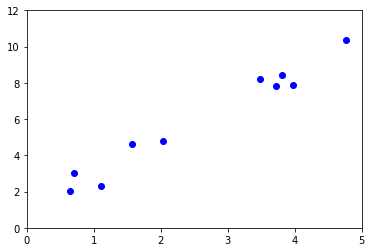

In [172]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mu, sigma = 0, 0.25 # mean and standard deviation
noise = np.random.normal(mu, sigma, 10)

X = np.random.rand(10)*5
#Y = np.random.rand(10)*5
Y = (X + noise)*2 + 1

print("Mean X:", np.mean(X))
print("Mean Y:", np.mean(Y))
 
plt.axis([0, 5, 0, 12])
plt.plot(X,Y,'bo')
plt.show()

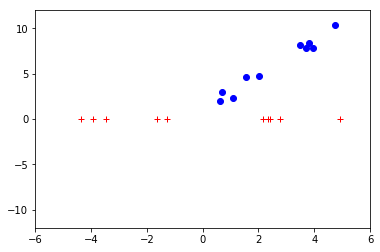

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

data = np.array([X, Y]).T
X_pca = pca.fit(data).transform(data)

plt.axis([-6, 6, -12, 12])
plt.plot(X,Y,'bo')
plt.plot(X_pca,np.zeros(10),'r+')
plt.show()

In [175]:
print(str(pca.explained_variance_ratio_))
print(pca.singular_values_)
print(pca.components_)
print(pca.mean_)

[ 0.99453121]
[ 9.94099684]
[[ 0.45724012  0.88934328]]
[ 2.57707602  5.94894882]


[[  1.83388107   0.78738564   3.56999893   4.83440856   2.00001663
    3.65517765   0.99036165   3.67803215   0.57816947   3.84332846]
 [  4.50341637   2.46795702   7.8802083   10.33951612   4.82655411
    8.045883     2.86275037   8.09033556   2.06102643   8.41184096]]


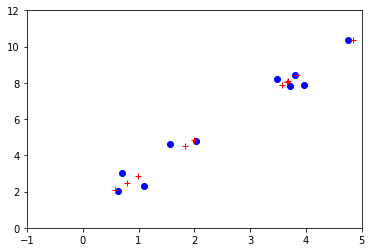

In [176]:
inverse = pca.inverse_transform(X_pca)
print(inverse.T)

plt.axis([-1, 5, 0, 12])
plt.plot(X,Y,'bo')
plt.plot(inverse.T[0], inverse.T[1], 'r+')
plt.show()

## PCA Iris dataset

explained variance ratio (first two components): [ 0.92461621  0.05301557]


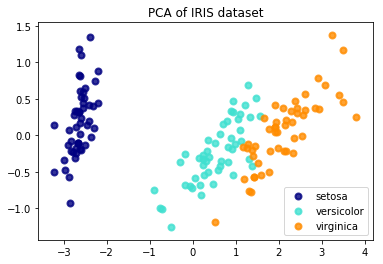

In [134]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()